# Prática Guiada: introdução a Support Vector Machine (SVM), -  Reconhecimento Facial.

#### Nessa prática vamos discutir uma aplicação do método de [Suppert Vector machine]() para o [reconhecimento facial](https://towardsdatascience.com/building-a-facial-recognition-model-using-pca-svm-algorithms-c81d870add16) de personalidades mundialmente conhecidas. Esse dataset é um trecho pré-processado conjunto de dados conhecido como [`Labeled Faces in the Wild (LFW)`](http://vis-www.cs.umass.edu/lfw/).


#### Cada imagem é centralizada em uma única face. Cada pixel de cada canal (cor em RGB) é codificado por um ponto flutuante no intervalo de $0.0$ a $1,0$.

#### A tarefa é chamada de [Reconhecimento](https://www.ijrte.org/wp-content/uploads/papers/v7i6s3/F1023376S19.pdf) de rosto (ou identificação): dada a imagem de um rosto, encontre o nome da pessoa que recebeu um conjunto de treinamento (galeria).

#### As imagens originais são $250 \times 250$ pixels, mas os argumentos de fatia e redimensionamento padrão os reduzem para $62 \times 47$.


#### Utilizando um conjunto de dados formado por milhares de fotos coletadas de diversas figuras públicas, incluído na biblioteca [`Scikit_Learn`](https://scikit-learn.org/) vamos aplicar a técnica SVM.

#### Primeiramente vamos importar: 

- A biblioteca [`sklearn.datasets.fetch_lfw_people`](https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py) para carregar o conjunto de dados rotulados de rostos pessoas conhecidas.

- A biblioteca [`matplotlib.pyplot`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html) para gerar os gráficos necessários.

- A biblioteca [`numpy`](https://numpy.org/) para a manipulação dos dados.

In [70]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
-->

#### Vamos aplicar a função [`fetch_lfw_people()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html) para carregar o conjunto de dados rotulados de rostos de pessoas ([LFW](https://scikit-learn.org/0.16/datasets/labeled_faces.html)) para classificação. 

#### Umas das características dessa função é que o conjunto de dados extraído retém apenas imagens de pessoas que tenham pelo menos `min_faces_per_person` imagens diferentes, um parâmetro da função. 

In [71]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person = 60)

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person = 60)
-->

#### O objeto `faces` é do tipo [`sklearn.utils.Bunch`](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html), contido no módulo [`sklearn.utils`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.utils).

In [72]:
type(faces)

sklearn.utils.Bunch

####  <span style = "color:red">Código Original.</span>
<!---
type(faces)
-->

#### Temos ainda os atributos: 

* `.target_names`: retorna o número de nomes que atendem à condição imposta pelo parâmetro `min_faces_per_person`.

*  `.images.shape`: retorna o formato do objeto `Bunch` que recebe os dados.

In [73]:
for name in faces.target_names:
     print(name)

Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Junichiro Koizumi
Tony Blair


####  <span style = "color:red">Código Original.</span>
<!---
for name in faces.target_names:
     print(name)
-->        

#### O atributo [`fetch_lfw_people().images`](https://www.kite.com/python/docs/sklearn.datasets.fetch_lfw_people) retorna um arranjo `numpy` de forma `(1, 3)`, em que cada linha é uma imagem de rosto correspondente a uma das $5749$ pessoas no conjunto de dados.

In [76]:
print(faces.images.shape)

(1348, 62, 47)


#### Podemos então representar gráficamente algumas das fotos, para saber com o que estamos trabalhando. 

#### Vamos aplicar a função [`plt.subplots()`](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.subplots.html) para definir um conjunto de subplots para uma figura, nesse caso com três linhas e cinco colunas.

#### Para a realização da plotagem vamos criar um `loop for` sobre  [`enumerate()`](https://docs.python.org/3/library/functions.html#enumerate), essa função retorna tuplas com elementos indexados. 

#### Nesse caso os valores retornados são iteradores `1-D`  dados pelo atributo [`.flat()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flat.html)  e capazes de serem acessados pela função [`.imshow()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html) para exibição das imagens associadas ao atributo `faces.images[i]`.

#### Quando a função [`.imshow()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html) é aplicada às imagens, é importante observar o parâmetro  `cmap`, que mapeia os dados escalares em cores.

#### Para esse plot não vamos dar nomes aos eixos, mantendo os  `xticks = []`,  `yticks = []` como listas vazias no método `.set()`, mas vamos dar rótulos para cada imagem, aplicando os nomes de target `target_names` de cada indivíduo ao parâmetro `xlabel`.

#### Vejamos um exemplor de aplicação da função `.flat()`.

In [77]:
#list(enumerate(ax.flat))
import numpy as np

a = np.array([[2,3],
              [4,5],
              [6,7]])

for i in a.flat:
    print(i)

2
3
4
5
6
7


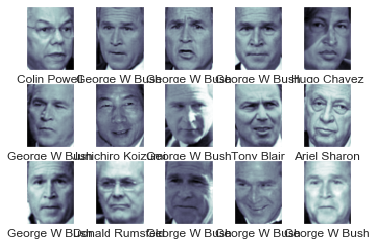

In [78]:
fig, ax = plt.subplots(3, 5)

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], 
               cmap = 'bone'
              )
    axi.set(xticks = [], 
            yticks = [], 
            xlabel = faces.target_names[faces.target[i]]
           )

####  <span style = "color:red">Código Original.</span>
<!---
fig, ax = plt.subplots(3, 5)

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], 
               cmap = 'bone'
              )
    axi.set(xticks = [], 
            yticks = [], 
            xlabel = faces.target_names[faces.target[i]]
           )
-->

### PCA e SVM.

#### Cada imagem tem $[62 \times 47]$ ou quase $3.000$ `pixels`.

#### É possível prosseguir usando simplesmente cada valor de `pixel` como uma característica, mas geralmente é mais eficaz usar algum tipo de pré-processador para extrair características mais significativas. 

#### Aqui, vamos usar uma análise de componentes principais, [`PCA`](https://builtin.com/data-science/step-step-explanation-principal-component-analysis), para [extrair](https://www.ijrte.org/wp-content/uploads/papers/v7i6s3/F1023376S19.pdf) `150` componentes fundamentais para alimentar nosso classificador `SVM`. 

#### Faremos o `split` entre subconjuntos de treino e teste para poder avaliar o classificador. 

#### Aqui usaremos como características descritivas os dados obtidos com a aplicação do atributo [`.data`](https://www.kite.com/python/docs/sklearn.datasets.fetch_lfw_people), que retorna um arranjo `numpy` de formato $(13233, 2914)$ em que cada linha corresponde a uma imagem de rosto embaralhada do tamanho original $62 \times 47$ pixels. 

#### Os targets são dados pelo atributo [`.target`](https://www.kite.com/python/docs/sklearn.datasets.fetch_lfw_people), um arranjo `numpy` de forma $(13233,)$, com rótulos associados a cada imagem de rosto. Esses rótulos variam de $0$ a $5748$ e correspondem aos `IDs` dos indivíduos.

#### Para o embaralhamento dos dados usamos o parâmetro `random_state`.

In [79]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, 
                                                faces.target, 
                                                random_state = 42
                                               )

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, 
                                                faces.target, 
                                                random_state = 42
                                               )
-->

#### Podemos treinar o modelo [`Principal component analysis`]() [(PCA)](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60) sobre os dados de treinamento para reduzir as dimensões.

#### Vamos importar:  

* A biblioteca [`sklearn.svm.SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) é uma classe capaz de executar classificação binária e multi-classe em um conjunto de dados.

* A biblioteca [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) que aplica a redução de dimensionalidade linear usando a Decomposição de Valor Singular [(SVD)](https://medium.com/@jonathan_hui/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491) dos dados para projetá-los em um espaço dimensional inferior. Os dados de entrada são centralizados, mas não redimensionados para cada recurso antes de aplicar o SVD.

#### Na função `PCA` observamos os parâmetros:

- `n_components`: Para definir o número de componentes a serem mantidos;
- `whiten`": Quando definido como `True`, os `components_` vetores são multiplicados pela raiz quadrada de `n_samples` e depois divididos pelos valores singulares para garantir saídas não correlacionadas com variações de unidade de componente.
- `svd_solver`: Define o tipo de solucionador a ser empregado para a redução de dimensionalidade.
- `random_state`: Cria uma semente pseudo-aleatória para quando `svd_solver = 'randomized'`.

In [80]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA

pca = PCA(n_components = 150, 
          whiten = True, 
          svd_solver = 'randomized', 
          random_state = 42
         )

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.svm import SVC
from sklearn.decomposition import PCA

pca = PCA(n_components = 150, 
          whiten = True, 
          svd_solver = 'randomized', 
          random_state = 42
         )
-->

#### Uma vez que reduzimos as dimensões do conjunto de treinamento com o método [`PCA`](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c), vamos realizar o ajuste dos dados de treino a esse modelo, para isso usamos: 

- A função [`.fit()`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit), que realiza o ajuste propriamente dito.

- A função [`.transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.transform), que aplica a redução de dimensionalidade nos dados de treino e os projeta nos primeiros componentes principais extraídos anteriormente do conjunto de treinamento.

In [81]:
model_pca = pca.fit(Xtrain)

X_train_pca = model_pca.transform(Xtrain)

####  <span style = "color:red">Código Original.</span>
<!---
model_pca = pca.fit(Xtrain)

X_train_pca = model_pca.transform(Xtrain)
-->

#### Observe a diferença entre as formas do conjunto de treino antes e depois da redução de dimensionalidade com a aplicação do atributo [`.shape`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html).

In [82]:
print(Xtrain.shape)
print(X_train_pca.shape)

(1011, 2914)
(1011, 150)


####  <span style = "color:red">Código Original.</span>
<!---
print(Xtrain.shape)
print(X_train_pca.shape)
-->

### Cross Validation.

#### Vamos usar validação cruzada para explorar uma "rede" de combinações de parâmetros. Aqui, vamos ajustar `C`, que controla a dureza da margem, e `gama`,  que controla o tamanho da base radial do núcleo da função, para determinar o melhor modelo:

#### Importamos a biblioteca:

* [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html), que avalia uma pontuação da validação cruzada.

#### Depois será necessário criar dois objetos `svc_C` e `svc_gamma`, que receberão, respectivamente, listas com valores possíveis para o termo de suavização das margens e o coeficiente de kernel para 'rbf', 'poly' e 'sigmoid'.

#### A idéia é percorrer um `loop for` duplo para `C` e `gamma`, calculando [`SVC()`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) a classificação de vetores de suporte e testando os valores da matriz de pontuações do estimador, com a função [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html), para cada execução da validação cruzada.

#### Ainda discutindo os [Parâmetros](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html) da função [`SVC()`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), devemos observar os parâmetros:

* `kernel`: Especifica o tipo de kernel a ser usado no algoritmo. Ele deve ser um dos itens 'linear', 'poli', 'rbf', 'sigmoid', 'pré-computado' ou que possa ser chamado. Se nada for fornecido, 'rbf' será usado. Se uma chamada é fornecida, ela é usada para pré-calcular a matriz do kernel a partir de matrizes de dados; essa matriz deve ter a forma `(n_samples, n_samples)`.

* `class_weight`: Define o parâmetro `C`, 

* `C`: Negocia a classificação correta dos exemplos de treinamento contra a maximização da margem da função de decisão. Para valores maiores de `C`, uma margem menor será aceita se a função de decisão for melhor na classificação correta de todos os pontos de treinamento. Um `C` mais baixo incentivará uma margem maior, portanto, uma função de decisão mais simples, ao custo da precisão do treinamento.

* `gamma`: Define até que ponto a influência de um único exemplo de treinamento alcança, com valores baixos que significam 'longe' e valores altos que significam 'próximos'. Pode ser vistos como o inverso do raio de influência das amostras selecionadas pelo modelo como vetores de suporte.

#### Para a escolha dos melhores valores de `C` e `gamma` vamos realizar uma varredura sobre uma faixa de valores possíveis para esses parâmetros.

In [83]:
from sklearn.model_selection import cross_val_score

svc_C = [1, 5, 10, 50]
svc_gamma = [0.0001, 0.0005, 0.001, 0.005]

error_rates = {}

for c in svc_C:
    for g in svc_gamma:
        model_svc = SVC(kernel = 'rbf', 
                        class_weight = 'balanced', 
                        C = c, 
                        gamma = g
                       )
        print (np.mean(cross_val_score(model_svc, 
                                       X_train_pca, 
                                       ytrain, 
                                       cv = 5
                                      )
                      ), 
               ' gamma:', g, 
               ' C:', c
              )
        
        error = 1 - np.mean(cross_val_score(model_svc, 
                                            X_train_pca, 
                                            ytrain, 
                                            cv = 5
                                           )
                           )
        error_rates.update({(c, g): error})

0.23123445349461055  gamma: 0.0001  C: 1
0.6339511291030582  gamma: 0.0005  C: 1
0.7982197727161878  gamma: 0.001  C: 1
0.8071404184753451  gamma: 0.005  C: 1
0.7140954982197727  gamma: 0.0001  C: 5
0.8071452958103693  gamma: 0.0005  C: 5
0.8150417012144564  gamma: 0.001  C: 5
0.8091303711651954  gamma: 0.005  C: 5
0.7992196263961372  gamma: 0.0001  C: 10
0.8051504657854947  gamma: 0.0005  C: 10
0.8150514558845046  gamma: 0.001  C: 10
0.8051748524606156  gamma: 0.005  C: 10
0.7982295273862363  gamma: 0.0001  C: 50
0.7962639613715065  gamma: 0.0005  C: 50
0.8111056918499733  gamma: 0.001  C: 50
0.8051748524606156  gamma: 0.005  C: 50


#### Construímos um dicionário para guardar os valores os valores dos hyperparâmetros `C` e `gamma`, juntamente com os erros associados às medidas.

In [84]:
error_rates

{(1, 0.0001): 0.7687655465053894,
 (1, 0.0005): 0.3660488708969418,
 (1, 0.001): 0.20178022728381217,
 (1, 0.005): 0.19285958152465488,
 (5, 0.0001): 0.2859045017802273,
 (5, 0.0005): 0.1928547041896307,
 (5, 0.001): 0.1849582987855436,
 (5, 0.005): 0.19086962883480463,
 (10, 0.0001): 0.2007803736038628,
 (10, 0.0005): 0.19484953421450535,
 (10, 0.001): 0.18494854411549544,
 (10, 0.005): 0.1948251475393844,
 (50, 0.0001): 0.20177047261376369,
 (50, 0.0005): 0.20373603862849354,
 (50, 0.001): 0.18889430815002672,
 (50, 0.005): 0.1948251475393844}

#### Nossa combinação de parâmetros emerge da medida do menor erro associado.

In [85]:
#print(error_rates)
min(error_rates, key = error_rates.get)

(10, 0.001)

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.model_selection import cross_val_score

svc_C = [1, 5, 10, 50]
svc_gamma = [0.0001, 0.0005, 0.001, 0.005]

for c in svc_C:
    for g in svc_gamma:
        model_svc = SVC(kernel = 'rbf', 
                        class_weight = 'balanced', 
                        C = c, 
                        gamma = g
                       )
        print (np.mean(cross_val_score(model_svc, 
                                       X_train_pca, 
                                       ytrain, 
                                       cv = 5
                                      )
                      ), 
               ' gamma:', g, 
               ' C:', c
              )
-->

#### Os valores ideais caem em direção ao centro da nossa rede de possíveis parâmetros. Se eles caírem nas bordas, devemos ampliar a rede para termos certeza de que encontramos o verdadeiro ideal.

#### Agora, com este modelo validado de forma cruzada, podemos prever as `tags` dos dados de teste que o modelo ainda não viu.

#### Vamos definir um modelo otimizado e aplicar novamente a função [`SVC()`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) para a classificação dos vetores de suporte, aplicando os hiperparâmetros encontrados.

In [86]:
model_svc_otimizado = SVC(kernel = 'rbf', 
                       class_weight = 'balanced', 
                       C = 10, 
                       gamma = 0.001
                      )

####  <span style = "color:red">Código Original.</span>
<!---
model_svc_otimizado = SVC(kernel = 'rbf', 
                       class_weight = 'balanced', 
                       C = 10, 
                       gamma = 0.005
                      )
-->

#### Agora ajustamos o modelo ideal com todos os dados de treinamento:

In [87]:
model_svc_otimizado.fit(X_train_pca, 
                     ytrain
                    )

SVC(C=10, class_weight='balanced', gamma=0.001)

####  <span style = "color:red">Código Original.</span>
<!---
model_svc_otimizado.fit(X_train_pca, 
                     ytrain
                    )
-->

## Previsão sobre dados não observados

#### Vamos então aplicar a função [`.transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.transform), que gera a redução de dimensionalidade nos dados de teste e os projeta nos primeiros componentes principais extraídos anteriormente do conjunto de treinamento.

In [88]:
# Primeiro passamos os dados de teste pelo mesmo processo de redução de dimensões
X_test_pca = model_pca.transform(Xtest)

####  <span style = "color:red">Código Original.</span>
<!---
X_test_pca = model_pca.transform(Xtest)
-->

#### Realizamos a previsão dos dados de teste com a função [`.predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.predict).

In [89]:
yfit = model_svc_otimizado.predict(X_test_pca)

####  <span style = "color:red">Código Original.</span>
<!---
yfit = model_svc_otimizado.predict(X_test_pca)
-->

#### Vamos ver algumas das imagens de teste junto com seus valores previstos.

#### Para isso vamos novamente aplicar a função [`plt.subplots()`](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.subplots.html) para definir um conjunto de subplots para uma figura, nesse caso com três linhas e cinco colunas.

#### Realizamos novamene um  `loop for` sobre  [`enumerate()`](https://docs.python.org/3/library/functions.html#enumerate), essa função, que retorna tuplas com elementos indexados. 

#### Os valores retornados são iteradores `1-D`  dados pelo atributo [`ax.flat`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flat.html)  e capazes de serem acessados pela função [`.imshow()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html) para exibição das imagens associadas ao atributo `faces.images[i]`.

#### Quando a função [`.imshow()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html) é aplicada às imagens de teste, e novamente o parâmetro  `cmap` mapeia os dados escalares em cores. Mas aqui vamos alterar o formato dos dados avaliados, refletindo a redução de dimensionalidade devido à aplicação do `PCA`.

#### Novamente, não vamos dar nomes aos eixos, mantendo os  `xticks = []`,  `yticks = []` como listas vazias no método `.set()`, mas vamos dar rótulos para cada imagem, aplicando os nomes dos target `target_names`.

#### Tomamos o cuidado de associar rótulos em preto às imagens corretamente classificadas e em vermelho àquelas classificadas com erro. Finalizamos o plote com um título pertinente.

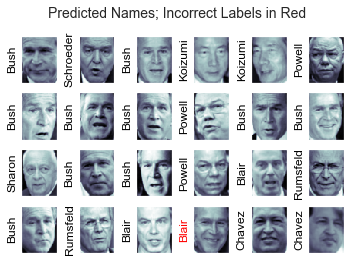

In [90]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


fig, ax = plt.subplots(4, 6)

for i, axi in enumerate(ax.flat):
    
    axi.imshow(Xtest[i].reshape(62, 47),
               cmap = 'bone'
              )
    axi.set(xticks = [], 
            yticks = []
           )
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], 
                   color = 'black' if yfit[i] == ytest[i] else 'red'
                  )
    fig.suptitle('Predicted Names; Incorrect Labels in Red', 
                 size = 14
                );

####  <span style = "color:red">Código Original.</span>
<!---
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    
    axi.imshow(Xtest[i].reshape(62, 47), 
               cmap = 'bone'
              )
    axi.set(xticks = [], 
            yticks = []
           )
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], 
                   color = 'black' if yfit[i] == ytest[i] else 'red'
                  )
    fig.suptitle('Predicted Names; Incorrect Labels in Red', 
                 size = 14
                );
-->

#### A partir desta pequena amostra, nosso estimador ideal erroneamente indicou apenas uma face. A importação da biblioteca [`sklearn.metrics.accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) ajuda a entender a acurácia do modelo.

In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, 
               yfit
              )

0.8486646884272997

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.metrics import accuracy_score
accuracy_score(ytest, 
               yfit
              )
-->

#### Podemos obter uma melhor percepção do desempenho de nosso estimador usando o relatório de classificação, ao importarmos a biblioteca [`sklearn.metrics.classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), que enumera as estatísticas de recuperação por tag.

#### A função [`classification_report()`](https://scikit-learn.org/0.18/modules/generated/sklearn.metrics.classification_report.html) gera o reporte mencionado:

* A precisão [`precision`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support) é a razão `tp / (tp + fp)`, em que `tp` é o número de verdadeiros positivos e `fp` o número de falsos positivos.

* O recall [`recall`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) é a razão `tp / (tp + fn)`

* O [`f1_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) é uma média ponderada da `precisão` e `recall`.

* O suporte [`support`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support) é o número de ocorrências de cada classe em `y_true`.

In [92]:
from sklearn.metrics import classification_report

print(classification_report(ytest, 
                            yfit, 
                            target_names = faces.target_names
                           )
     )

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.metrics import classification_report

print(classification_report(ytest, 
                            yfit, 
                            target_names = faces.target_names
                           )
     )
-->

#### Também podemos mostrar a matriz de confusão entre essas classes, se importarmos a biblioteca [`sklearn.metrics.confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html). 


#### Isso nos ajuda a ter uma ideia de quais tags podem ser as mais confusas para o estimador.

In [93]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, 
                       yfit
                      ))

[[ 11   1   2   1   0   0   0   0]
 [  2  59   2   3   0   0   0   2]
 [  1   2  26   1   0   0   0   1]
 [  2  11   3 105   2   1   0   2]
 [  0   0   1   1  19   0   1   1]
 [  1   1   0   2   1  14   0   1]
 [  0   0   0   0   0   0  12   0]
 [  0   0   1   1   0   0   0  40]]


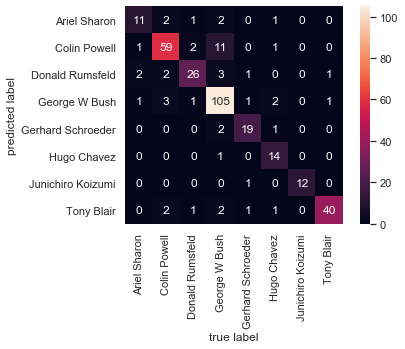

In [94]:
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, 
                       yfit
                      )
sns.heatmap(mat.T, 
            square = True, 
            annot = True, 
            fmt = 'd', 
            cbar = True, 
            xticklabels = faces.target_names, 
            yticklabels = faces.target_names
           )

plt.xlabel('true label')
plt.ylabel('predicted label');

####  <span style = "color:red">Código Original.</span>
<!---
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, 
                       yfit
                      )
sns.heatmap(mat.T, 
            square = True, 
            annot = True, 
            fmt = 'd', 
            cbar = False, 
            xticklabels = faces.target_names, 
            yticklabels = faces.target_names
           )

plt.xlabel('true label')
plt.ylabel('predicted label');
-->

#### Para uma tarefa de reconhecimento facial no mundo real, em que as fotos não são pré-cortadas em grades convenientes, a única diferença no esquema de classificação facial é a seleção de características: 

* você precisaria usar um algoritmo mais sofisticado para encontrar as faces e extrair características que são independentes da pixilação. 
* Para este tipo de aplicação, uma boa opção é usar o [`OpenCV.org`](https://opencv.org/), que, entre outras coisas, inclui implementações pré-treinadas de ferramentas de última geração para extração de características para imagens em geral e faces em particular.

##  <span style = "color:blue">Prática Independente.</span>
<!---
-->

#### Importe as bibliotecas necessárias para a realização de uma classificação com o método `support vector machine` e carregue os dados do dataset `breast-cancer.csv` em um dataframe e estude os dados.

####  <span style = "color:red">Código Original.</span>
<!---
# Importamos as bibliotecas a serem usadas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
-->

####  <span style = "color:red">Código Original.</span>
<!---
### Importamos os dados
df = pd.read_csv('breast-cancer.csv', header = None)

df.columns = ['ID', 'clump_Thickness', 'unif_cell_size', 
              'unif_cell_shape', 'adhesion', 'epith_cell_Size', 'bare_nuclei', 
              'bland_chromatin ','norm_nucleoli', 'mitoses', 'class_t']

df.sample(3)
-->

####  <span style = "color:red">Código Original.</span>
<!---
df['class_t'].unique()
-->

####  <span style = "color:red">Código Original.</span>
<!---
df['class_t'][df['class_t'] == 2] = 0
df['class_t'][df['class_t'] == 4] = 1
df.sample(3)
-->

####  <span style = "color:red">Código Original.</span>
<!---
df['class_t'].unique()
-->

####  <span style = "color:red">Código Original.</span>
<!---
df.info()
-->

####  <span style = "color:red">Código Original.</span>
<!---
df.shape
-->

####  <span style = "color:red">Código Original.</span>
<!---
df.describe()
-->

#### Divida o conjunto de dados entre atributos descritivos e targets.

####  <span style = "color:red">Código Original.</span>
<!---
X = df[
    ['clump_Thickness', 'unif_cell_size',
     'unif_cell_shape', 'adhesion', 
     'epith_cell_Size', 'bare_nuclei', 
     'bland_chromatin ','norm_nucleoli', 
     'mitoses' 
    ]
]
-->

####  <span style = "color:red">Código Original.</span>
<!---
y = df['class_t']
-->

#### Separe os conjuntos entre dados de teste e treino, investigue os hyperparâmetros e aplique a função kernel do tipo `linear`, observando o balanceamento do peso das classes.

####  <span style = "color:red">Código Original.</span>
<!---
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 53
                                                   )
-->

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.model_selection import cross_val_score

svc_C = [0.1, 0.2, 0.3]

error_rates = {}

for c in svc_C:
        model_svc = SVC(kernel = 'linear', 
                        class_weight = 'balanced', 
                        C = c
                       )
        print (np.mean(cross_val_score(model_svc, 
                                       X_train, 
                                       y_train, 
                                       cv = 5
                                      )
                      ),
               ' C:', c
              )
        
        error = 1 - np.mean(cross_val_score(model_svc, 
                                            X_train, 
                                            y_train, 
                                            cv = 5
                                           )
                           )
        error_rates.update({(c): error})
-->

####  <span style = "color:red">Código Original.</span>
<!---
print(error_rates)
min(error_rates, key = error_rates.get)
-->

#### Escolha o hiperparâmetro mais adequado e realize suas previões com o modelo otimizado.

####  <span style = "color:red">Código Original.</span>
<!---
optimalC = min(error_rates, key = error_rates.get)
-->

####  <span style = "color:red">Código Original.</span>
<!---
best_model = SVC(C = optimalC, 
                 kernel = 'linear'
                )
-->

####  <span style = "color:red">Código Original.</span>
<!---
best_model.fit(X_train, 
               y_train
              )
-->

####  <span style = "color:red">Código Original.</span>
<!---
y_pred = best_model.predict(X_test)
-->

#### Apresente a reporte das classificações e crie a matriz de confusão para os dados.

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.metrics import classification_report

print(classification_report(y_test, 
                            y_pred
                           )
     )
-->

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, 
                       y_pred
                      )
     )
-->

#### Crie um mapa de calor para a matriz de confusão e meça a acurácia de suas previões.

####  <span style = "color:red">Código Original.</span>
<!---
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test, 
                       y_pred
                      )
sns.heatmap(mat.T, 
            square = True, 
            annot = True, 
            fmt = 'd', 
            cbar = True
           )

plt.xlabel('true label')
plt.ylabel('predicted label');
-->

####  <span style = "color:red">Código Original.</span>
<!---
accuracy_score(y_test, 
               y_pred
              )
-->